In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style
from pandas.tools.plotting import scatter_matrix
import numpy as np

housing_df=pd.read_csv("housing.csv")
housing_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [2]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [18]:
# This line shows us where are the null values (which column)
housing_df.isna().any()

longitude             False
latitude              False
housing_median_age    False
total_rooms           False
total_bedrooms         True
population            False
households            False
median_income         False
median_house_value    False
ocean_proximity       False
dtype: bool

# There are 207 null values in the total_bedrooms column, this dimension needs to be further investigated 

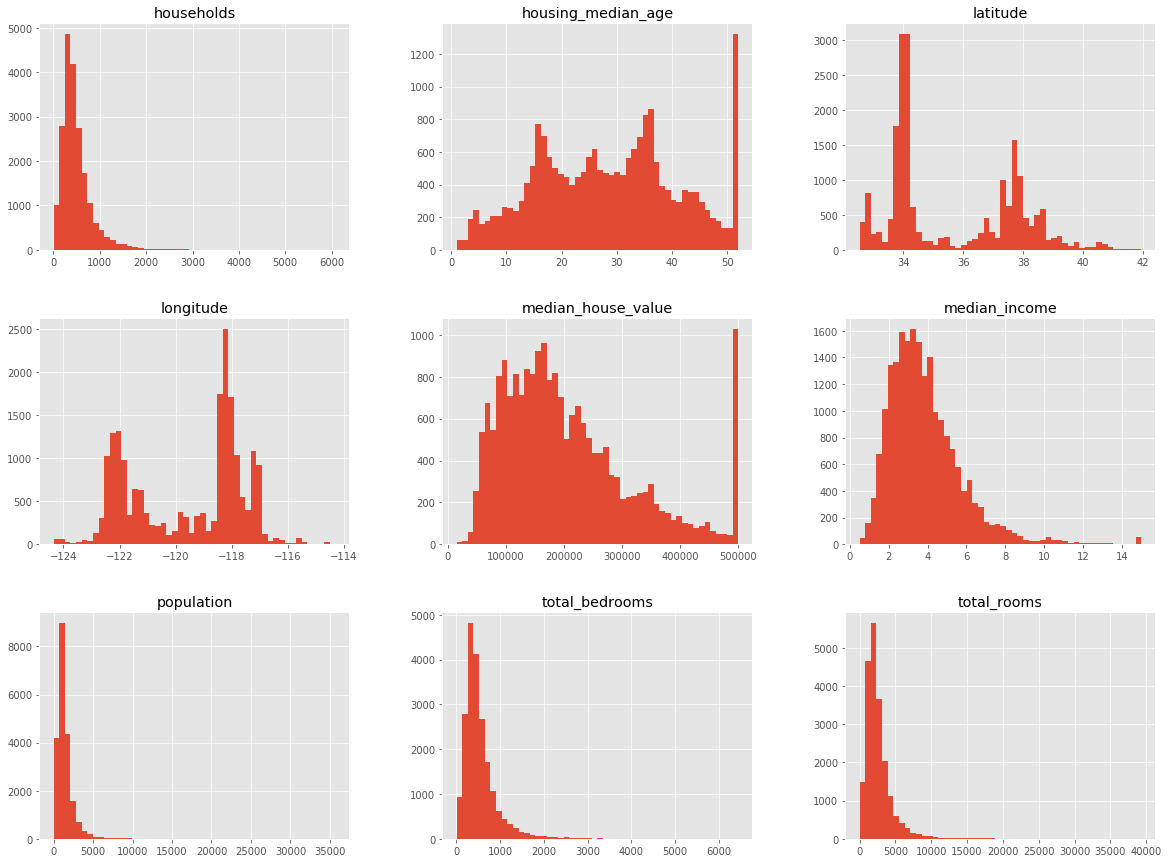

In [3]:
# Let's draw a bar chart of all the dimensions of the dataframe to look for unusual values



style.use("ggplot")
housing_df.hist(bins=50, figsize=(20,15))
plt.show()

# It is worth to investigate the 'housing_median_age' and the 'median_house_value' columns because their histograms display a pretty odd peak at the end of the chart. It could mean that houses with a median age or value above the limit of the charts (respectively 52 years and 500k USD) were all counted with the maximum value of the chart itself. This could end up in discarding those rows because they don't represent accurate values thus badly affecting the accuracy of our ML model.

In [ ]:
# This box is to investigate further the odd values in the columns 'housing_median_age' and 'median_house_value'

high_median_age=housing_df[(housing_df['housing_median_age']==52.0) | (housing_df['median_house_value']>=500000.0)]
style.use("ggplot")
high_median_age.hist(bins=50, figsize=(20,15))
plt.show()

In [4]:
# Let's drop those rows where 'housing_median_age'<52 or 'median_house_value'<500k
# creating a df where we save the discarded rows

housing_discarded=housing_df[(housing_df['housing_median_age']==52.0) | (housing_df['median_house_value']>=500000.0)]
housing_discarded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2085 entries, 2 to 20592
Data columns (total 10 columns):
longitude             2085 non-null float64
latitude              2085 non-null float64
housing_median_age    2085 non-null float64
total_rooms           2085 non-null float64
total_bedrooms        2071 non-null float64
population            2085 non-null float64
households            2085 non-null float64
median_income         2085 non-null float64
median_house_value    2085 non-null float64
ocean_proximity       2085 non-null object
dtypes: float64(9), object(1)
memory usage: 179.2+ KB


51.0 499100.0


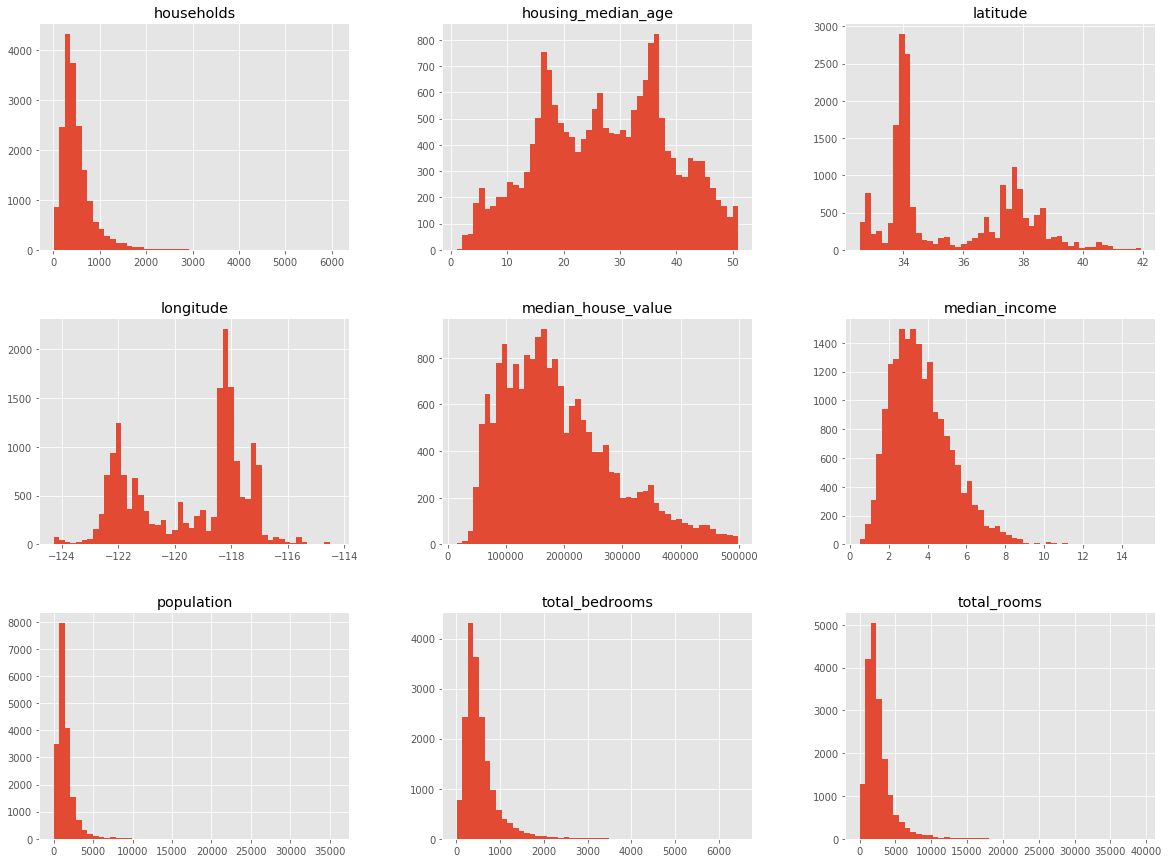

In [5]:
# Let's save the cleaned data in a new df housing_kept

housing_kept=housing_df[housing_df['housing_median_age']!=52.0]
housing_kept=housing_kept[housing_kept['median_house_value']<500000.0]

print(housing_kept['housing_median_age'].max(),housing_kept['median_house_value'].max())

style.use("ggplot")
housing_kept.hist(bins=50, figsize=(20,15))
plt.show()

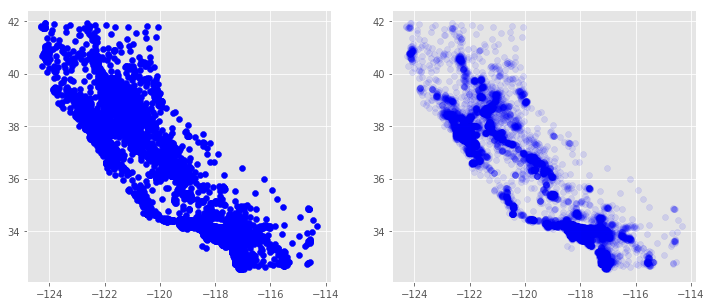

In [6]:
# We are plotting now all the coordinates of the istances of the df. It is also useful to display the chart with just
# the densest localizations (done setting the parameter alpha=0.1)
style.use("ggplot")
fig=plt.figure(figsize=(12,5))
ax1=fig.add_subplot(1,2,1)
ax1.scatter(housing_kept['longitude'],housing_kept['latitude'], c='blue')
ax2=fig.add_subplot(1,2,2)
ax2.scatter(housing_kept['longitude'],housing_kept['latitude'], alpha=0.1, c='blue')

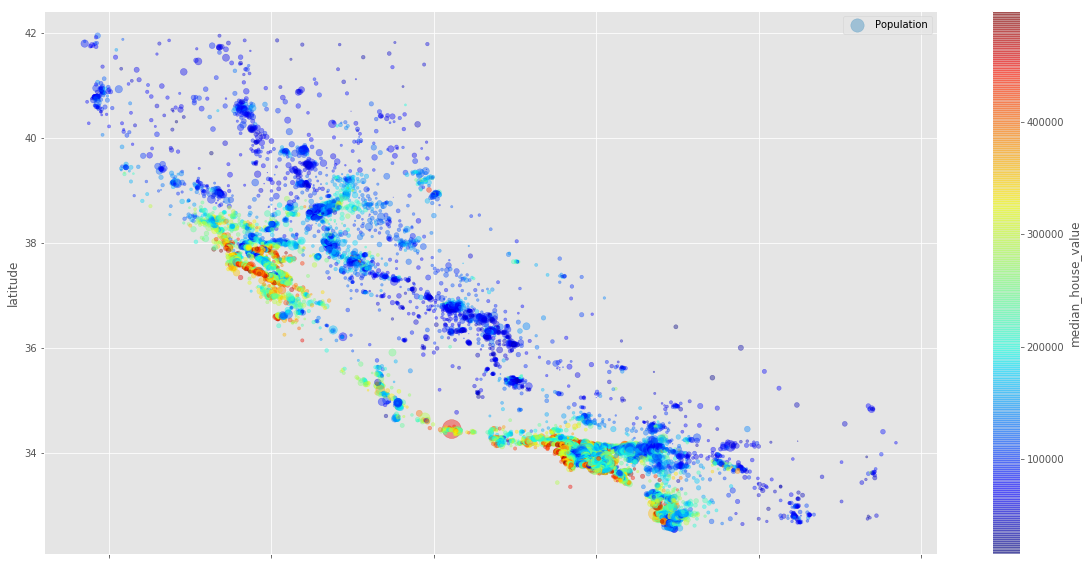

In [7]:
#Let's plot a map where we'd understand the population density by circle size and the median house value by color
style.use("ggplot")
plt.rcParams["figure.figsize"] = (20,10)
housing_kept.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4, s=housing_df["population"]/100, label="Population",
c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,)
plt.legend()
plt.show()

In [8]:
#Let's see what other column is correlated with the column 'median_house_value'
corr_matrix = housing_kept.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.664340
total_rooms           0.153887
households            0.100565
total_bedrooms        0.079879
population            0.022542
housing_median_age    0.014121
longitude            -0.022901
latitude             -0.171565
Name: median_house_value, dtype: float64

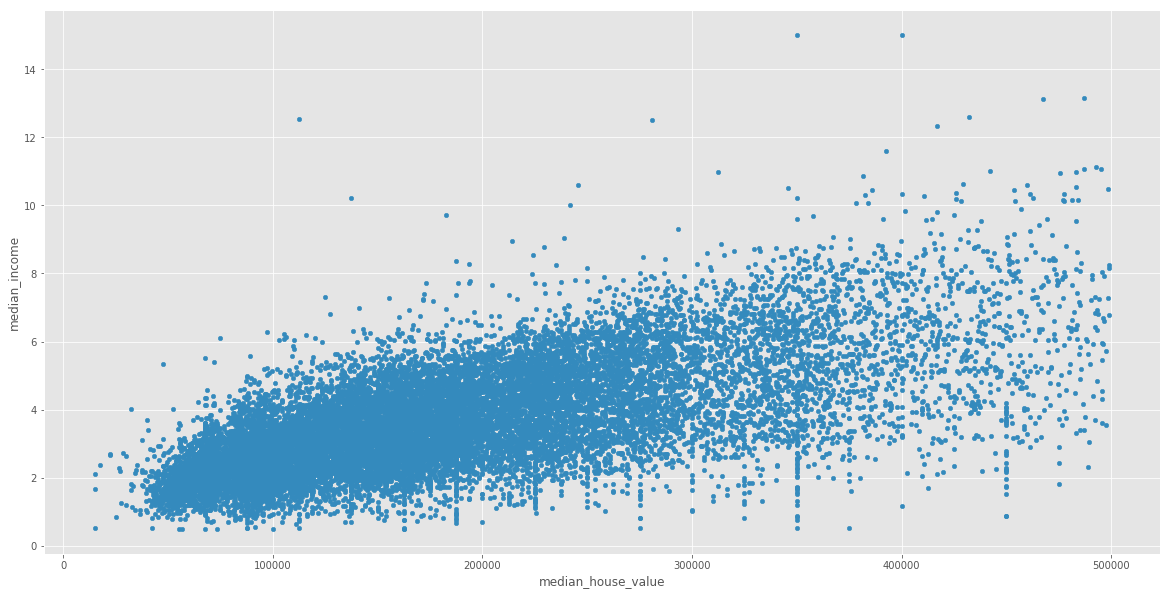

In [9]:
# The median_house_value seems to be positively correlated to the 'median_income' column, let's have a look at the scatter plot
housing_kept.plot(kind="scatter", x="median_house_value", y="median_income")

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  """


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000FE86C88>,
      dtype=object)

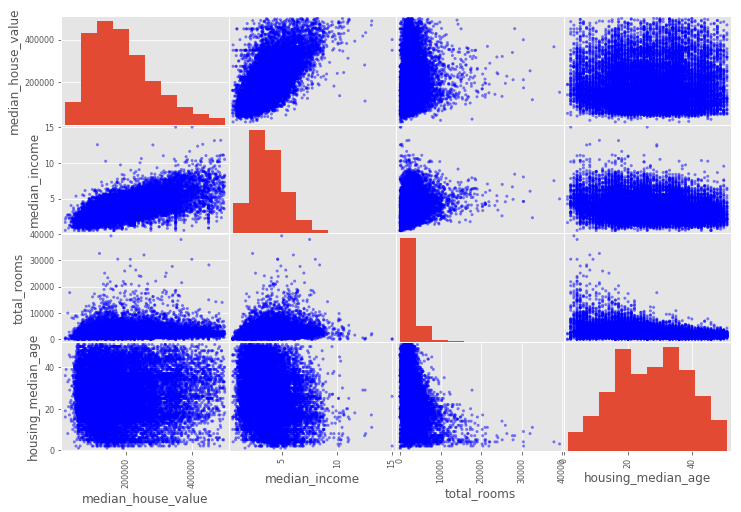

In [10]:
# Now let's just have a look at the scatter matrix between the columns that are positively correlated

attributes = ["median_house_value", "median_income", "total_rooms",
"housing_median_age"]
scatter_matrix(housing_kept[attributes], figsize=(12, 8), c='blue')

In [10]:
# We are now replacing the values of the column 'ocean_proximity', which has string values, with other 5 logic columns
# named after the attributes of the 'ocean_proximity' column itself and with values 1 or 0. This way the machine
# should not be affected by a random assignation of numbers to the strings of the columns.

ocean_prox=['<1H OCEAN', 'INLAND','NEAR OCEAN','NEAR BAY','ISLAND']
for i in range(len(ocean_prox)):
    housing_kept[ocean_prox[i]]=housing_kept['ocean_proximity'].apply(lambda x: 1 if x==ocean_prox[i] else 0)
housing_kept.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,<1H OCEAN,INLAND,NEAR OCEAN,NEAR BAY,ISLAND
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,0,0,0,1,0
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY,0,0,0,1,0
15,-122.26,37.85,50.0,1120.0,283.0,697.0,264.0,2.1250,140000.0,NEAR BAY,0,0,0,1,0
18,-122.26,37.84,50.0,2239.0,455.0,990.0,419.0,1.9911,158700.0,NEAR BAY,0,0,0,1,0


In [11]:
housing_2=housing_kept.copy()

In [12]:
# Proceeding to normalizing the metric columns 
columns=['longitude','latitude','housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value']
for n in range(len(columns)):
    if n==0:
        housing_2[columns[n]]=housing_2[columns[n]]/-124.35
    if n>0:
        housing_2[columns[n]]=housing_2[columns[n]]/housing_2[columns[n]].max()
housing_2.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,<1H OCEAN,INLAND,NEAR OCEAN,NEAR BAY,ISLAND
0,0.982951,0.902980,0.803922,0.022380,0.020016,0.009024,0.020717,0.555010,0.906832,NEAR BAY,0,0,0,1,0
1,0.982871,0.902503,0.411765,0.180544,0.171606,0.067289,0.187110,0.553423,0.718293,NEAR BAY,0,0,0,1,0
8,0.983193,0.902026,0.823529,0.064980,0.103181,0.033799,0.097830,0.138692,0.454218,NEAR BAY,0,0,0,1,0
15,0.983193,0.902265,0.980392,0.028484,0.043910,0.019534,0.043407,0.141666,0.280505,NEAR BAY,0,0,0,1,0
18,0.983193,0.902026,0.980392,0.056943,0.070597,0.027745,0.068892,0.132739,0.317972,NEAR BAY,0,0,0,1,0


In [13]:
housing_3=housing_2[['longitude','latitude','housing_median_age', 'total_rooms', 'total_bedrooms', 'population','households',
                      'median_income','median_house_value','<1H OCEAN','INLAND','NEAR OCEAN','NEAR BAY', 'ISLAND']]
# Replacing the Nan values of 'total_bedrooms' with its median value
housing_3['total_bedrooms'].fillna(housing_3['total_bedrooms'].median(), inplace=True)
housing_3['total_bedrooms'].isnull().sum()

D:\Anaconda\lib\site-packages\pandas\core\generic.py:5434: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


0

## Now the data are clean and we have chosen the attributes and metric columns

# Steps to use the Linear Regression model:

## Setting up the model

In [14]:
# Trying to use the linear regression to verify if it reproduces well the datas

import sklearn
from sklearn import linear_model
from sklearn.utils import shuffle

# Defining the attributes (x) and the labels (y)

predict='median_house_value'
# x is made of all the columns of the dataframe but the one saved in the predict variable
# y is made only by the column identified by the predict variable
x=np.array(housing_3.drop([predict], 1))
y=np.array(housing_3[predict])

# Splitting the two sets in two batches: Train and test
x_train_lin, x_test_lin, y_train_lin, y_test_lin = sklearn.model_selection.train_test_split(x,y,test_size=0.2)

# Setting the model
linear=linear_model.LinearRegression()
linear.fit(x_train_lin, y_train_lin)
accuracy_lin=linear.score(x_test_lin,y_test_lin)

# Let's print out the coefficients of our linear model
#print('Slopes:', linear.coef_)
#print('Intercept:', linear.intercept_)

# Let's print out what's the accuracy of our model
if accuracy_lin<0.8:
    print('The Linear Regression model\'s doesn\'t adapt to the data because its accuracy is:', round(accuracy_lin,2))
if accuracy_lin>=0.8:
    print('The Linear Regression model\'s fits the data with an accuracy of:', round(accuracy_lin,2))

The Linear Regression model's doesn't adapt to the data because its accuracy is: 0.61


## Testing the model

In [19]:
# Let's check what are the predictions made by our model and how close they get to the actual test values (y_test)
# We are also printing out the x_test values

predictions_lin=linear.predict(x_test_lin)

#for a in range(len(predictions_lin)):
#    print("Predicted value:", predictions_lin[a], "Actual value:", y_test_lin[a], "Input values:\n", x_test_lin[a])

Text(0,0.5,'Predicted Values')

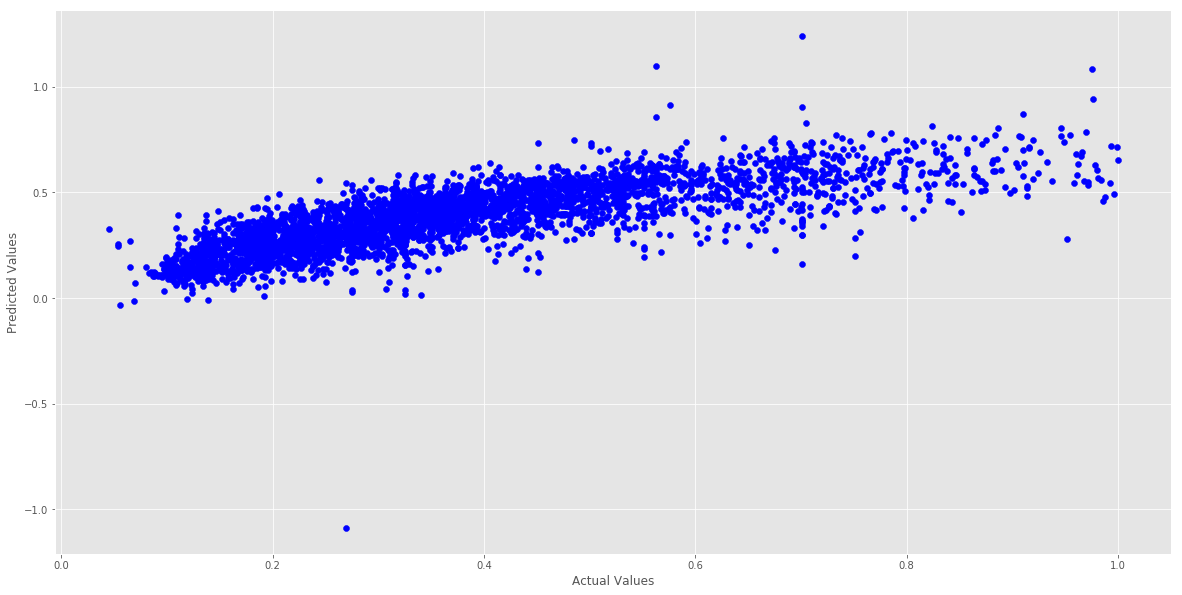

In [38]:
#Let's plot the actual values against the predictions to check the accuracy

fig, ax = plt.subplots()
#ax.plot(y_test_lin, label='actual')
#ax.plot(predictions_lin,label='predicted')
ax.scatter(y_test_lin,predictions_lin, c='blue')
ax.set_xlabel('Actual Values')
ax.set_ylabel('Predicted Values')
#plt.legend(loc=0)


In [27]:
# Calculating the RMSE which is the typical prediction error on the column 'median_house value'

from sklearn.metrics import mean_squared_error

lin_mse = mean_squared_error(y_test_lin, predictions_lin)
lin_rmse = np.sqrt(lin_mse)
typical_error_lin=lin_rmse*housing_kept['median_house_value'].max()

usd_range=housing_kept['median_house_value'].max()-housing_kept['median_house_value'].min()

print('Linear Model Accuracy:', round(accuracy_lin,2))
print('The typical prediction error is:',round(typical_error_lin,2), 'USD')
print('The maximum value of the target column is:', housing_kept['median_house_value'].max(), 'USD')
print('The minimum value of the target column is:', housing_kept['median_house_value'].min(), 'USD')
print('The error percentage is:',round((typical_error_lin/usd_range)*100,2), '%')

Linear Model Accuracy: 0.61
The typical prediction error is: 59195.9 USD
The maximum value of the target column is: 499100.0 USD
The minimum value of the target column is: 14999.0 USD
The error percentage is: 12.23 %


# The Linear Regression model doesn't fit our data so let's try another model

## Decision Tree Regressor

In [28]:
from sklearn.tree import DecisionTreeRegressor

# Defining the attributes (x) and the labels (y)

predict='median_house_value'
# x is made of all the columns of the dataframe but the one saved in the predict variable
# y is made only by the column identified by the predict variable
x=np.array(housing_3.drop([predict], 1))
y=np.array(housing_3[predict])

# Splitting the two sets in two batches: Train and test
x_train_tree, x_test_tree, y_train_tree, y_test_tree = sklearn.model_selection.train_test_split(x,y,test_size=0.2)


tree_reg = DecisionTreeRegressor()
tree_reg.fit(x_train_tree, y_train_tree)
predictions_tree= tree_reg.predict(x_test_tree)

# Calculating the RMSE of the Decision Tree Model
tree_mse = mean_squared_error(y_test_tree, predictions_tree)
tree_rmse = np.sqrt(tree_mse)
typical_error_tree=tree_rmse*housing_kept['median_house_value'].max()
accuracy_tree=tree_reg.score(x_test_tree,y_test_tree)

print('Decision Tree Model Accuracy:', round(accuracy_tree,2))
print('The typical prediction error is:',round(typical_error_tree,2), 'USD')
print('The maximum value of the target column is:', housing_kept['median_house_value'].max(), 'USD')
print('The minimum value of the target column is:', housing_kept['median_house_value'].min(), 'USD')
print('The error percentage is:',round((typical_error_tree/usd_range)*100,2),'%')

Decision Tree Model Accuracy: 0.59
The typical prediction error is: 61724.81 USD
The maximum value of the target column is: 499100.0 USD
The minimum value of the target column is: 14999.0 USD
The error percentage is: 12.75 %


Text(0,0.5,'Predicted Values')

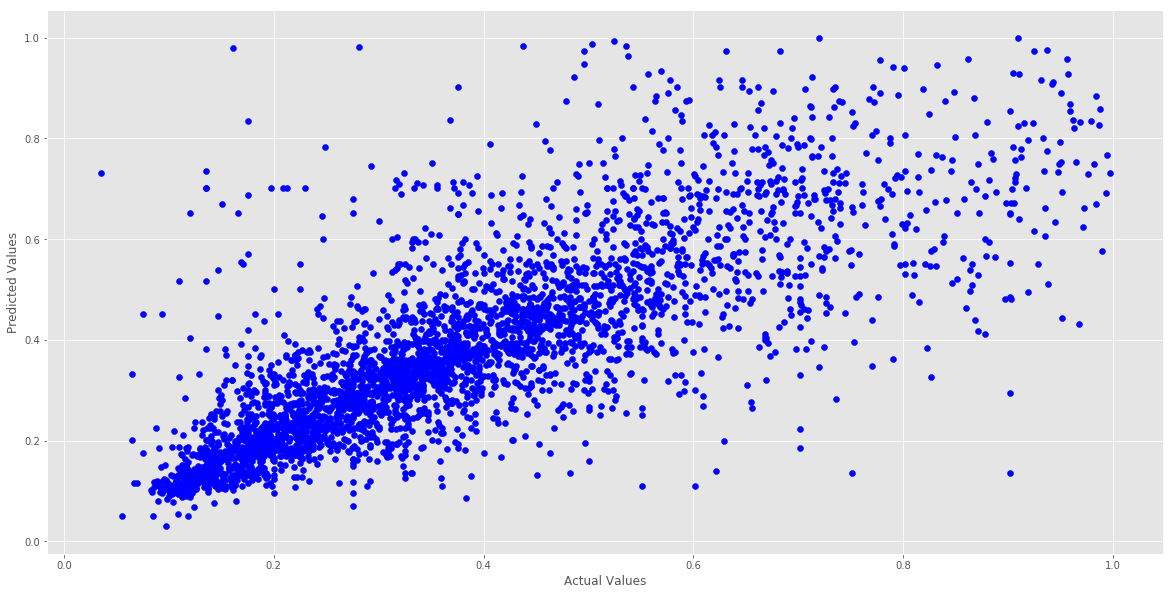

In [40]:
#Let's plot the actual values against the predictions to check the accuracy

fig, ax = plt.subplots()
# The following lines are to plot a line chart
#ax.plot(y_test_tree, label='actual')
#ax.plot(predictions_tree,label='predicted')
#plt.legend(loc=0)

# The following lines are to plot a scatter chart
ax.scatter(y_test_tree,predictions_tree, c='blue')
ax.set_xlabel('Actual Values')
ax.set_ylabel('Predicted Values')

# The Decision Tree Regressor model doesn't fit our data either

# Could this be because the training set that we chose is not the best we could choose?

# NOTE: When still deciding which model to use, it is important to just don’t touch the test set until you are ready to launch a model you are confident about (whose accuracy is above 0.8). So when trying to pick a model you have to divide your data into 3 parts. One to TRAIN (60%), one to VALIDATE (20%) and one to TEST (20%). You'll use the TRAIN set to train the data and the VALIDATION set to test it. The same you'll do with another model if you have to change it. Finally you'll use the TEST set only after having picked the model to test this final model!

# A great alternative is to use Scikit-Learn’s cross-validation feature. It performs K-fold cross-validation: it randomly splits the training set into 10 distinct subsets called folds, then it trains and evaluates the Decision Tree model 10 times, picking a different fold for evaluation every time and training on the other 9 folds. The result is an array containing the 10 evaluation scores:

In [29]:
# CROSS VALIDATION 10-FOLD ON THE DECISION TREE REGRESSOR

from sklearn.model_selection import cross_val_score
tree_scores = cross_val_score(tree_reg, x_train_tree, y_train_tree, scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-tree_scores)

# Scikit-Learn cross-validation features expect a utility function (greater is better) 
# rather than a cost function (lower is better), so the scoring function is actually the opposite 
# of the MSE (i.e., a negative value), which is why the preceding code computes '-scores' before 
# calculating the square root.

def display_scores(scores):
    print("Scores:", scores*housing_kept['median_house_value'].max())
    print("Mean:", scores.mean()*housing_kept['median_house_value'].max())
    print("Standard deviation:", scores.std()*housing_kept['median_house_value'].max())
display_scores(tree_rmse_scores)
print('The typical prediction error without cross-validation is:',round(typical_error_tree,2), 'USD')

Scores: [60156.3803771  59644.56730608 60875.87239444 61924.58476318
 59778.30440238 60570.27152134 60020.1399633  62720.69003633
 61548.55353914 58739.67788768]
Mean: 60597.90421909575
Standard deviation: 1131.8312577607737
The typical prediction error without cross-validation is: 61724.81 USD


# Even using the Cross-validation technique we don't get satisfying results. Probably the Decision Tree Regressor overfits our data!

# Let's try using the Cross-validation on the Linear Regression:

In [30]:
lin_scores = cross_val_score(linear, x_train_lin, y_train_lin, scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)
print('The typical prediction error without cross-validation is:',round(typical_error_lin,2), 'USD')

Scores: [5.81357144e+04 5.73744061e+04 5.88238124e+04 5.88727546e+04
 6.04931508e+04 7.60644432e+14 6.16132670e+04 5.53171000e+04
 5.65369802e+04 5.64576968e+04]
Mean: 76064443264462.31
Standard deviation: 228193329618845.28
The typical prediction error without cross-validation is: 59195.9 USD


# The Cross-validation technique performs badly even with the Linear Regression

In [31]:
from sklearn.ensemble import RandomForestRegressor

# Defining the attributes (x) and the labels (y)

predict='median_house_value'
x=np.array(housing_3.drop([predict], 1))
y=np.array(housing_3[predict])

# Splitting the two sets in two batches: Train and test
x_train_for, x_test_for, y_train_for, y_test_for = sklearn.model_selection.train_test_split(x,y,test_size=0.2)

# Testing Random Forest model
forest_reg = RandomForestRegressor()
forest_reg.fit(x_train_for, y_train_for)
predictions_for = forest_reg.predict(x_test_for)
forest_mse = mean_squared_error(y_test_for, predictions_for)
forest_rmse = np.sqrt(tree_mse)
typical_error_for=forest_rmse*housing_kept['median_house_value'].max()
accuracy_for=tree_reg.score(x_test_for,y_test_for)
print('Random Forest Model Accuracy:', round(accuracy_for,2))
print('The typical prediction error is:',round(typical_error_for,2), 'USD')
print('The maximum value of the target column is:', housing_kept['median_house_value'].max(), 'USD')
print('The minimum value of the target column is:', housing_kept['median_house_value'].min(), 'USD')
print('The error percentage is:',round((typical_error_for/usd_range)*100,2), '%')


#Appliying Cross-validation to the Random Forest Model
for_scores = cross_val_score(forest_reg, x_train_for, y_train_for, scoring="neg_mean_squared_error", cv=10)
for_rmse_scores = np.sqrt(-for_scores)
display_scores(for_rmse_scores)
print('The typical prediction error without cross-validation is:',round(typical_error_for,2), 'USD')





Random Forest Model Accuracy: 0.9
The typical prediction error is: 61724.81 USD
The maximum value of the target column is: 499100.0 USD
The minimum value of the target column is: 14999.0 USD
The error percentage is: 12.75 %
Scores: [44408.25886237 47452.98460739 46381.80905341 44354.63460478
 48029.9207163  45454.59213562 45093.93214775 47507.27195261
 42984.9105238  48147.98310677]
Mean: 45981.629771079235
Standard deviation: 1694.3997882411127
The typical prediction error without cross-validation is: 61724.81 USD


In [ ]:
# This box is to check the accuracy of the predictions with the Random Forest Model

for a in range(len(predictions_for)):
    print("Predicted value:", round(predictions_for[a],3), "Actual value:", round(y_test_for[a],3))
    #print("Predicted value:", predictions_for[a], "Actual value:", y_test_for[a], "Input values:\n", x_test_for[a])

Text(0,0.5,'Predicted Values')

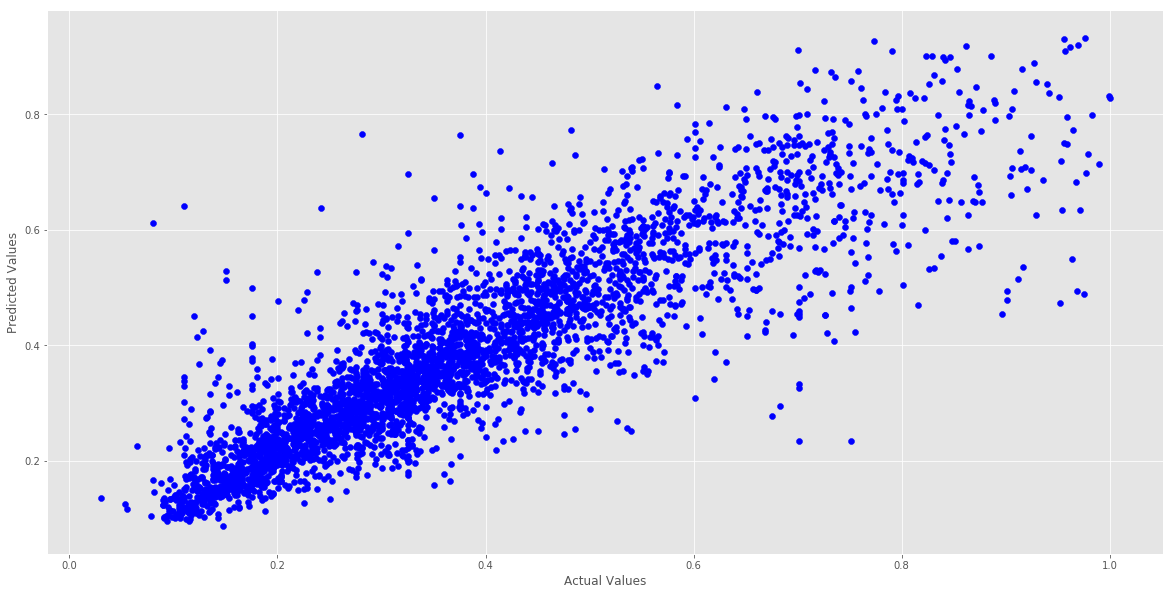

In [47]:
#Let's plot the actual values against the predictions to check the accuracy

fig, ax = plt.subplots()
# The following lines are to plot a line chart
#ax.plot(y_test_for, label='actual')
#ax.plot(predictions_for,label='predicted')
#plt.legend(loc=0)

# The following lines are to plot a scatter chat
ax.scatter(y_test_for,predictions_for, c='blue')
ax.set_xlabel('Actual Values')
ax.set_ylabel('Predicted Values')

Text(0.5,1,'Linear Regression Model')

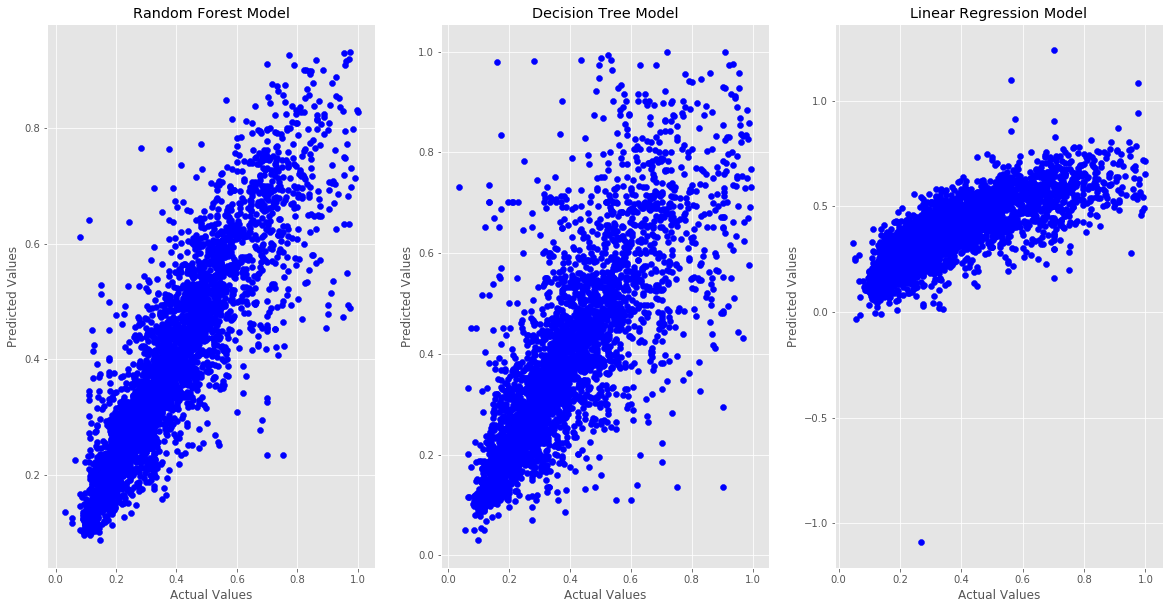

In [49]:
# Now let's plot the three different scatter plots (of the three tested models) together to compare the models
fig=plt.figure(figsize=(20,10))

ax1=fig.add_subplot(1,3,1)
ax1.scatter(y_test_for,predictions_for, c='blue')
ax1.set_xlabel('Actual Values')
ax1.set_ylabel('Predicted Values')
ax1.set_title('Random Forest Model')
ax2=fig.add_subplot(1,3,2)
ax2.scatter(y_test_tree,predictions_tree, c='blue')
ax2.set_xlabel('Actual Values')
ax2.set_ylabel('Predicted Values')
ax2.set_title('Decision Tree Model')
ax3=fig.add_subplot(1,3,3)
ax3.scatter(y_test_lin,predictions_lin, c='blue')
ax3.set_xlabel('Actual Values')
ax3.set_ylabel('Predicted Values')
ax3.set_title('Linear Regression Model')

# The Random Forest Model seems to be pretty accurate (92%)

## Now let's see how we can adjust some parameters to make the model perform even better

In [66]:
# We are now applying the GridSearchCV to see what are the best parameters with this Random Forest Model
# We are changing the number of trees (estimators) inside the random forest and the number of columns (features)
# That best fit our data

from sklearn.model_selection import GridSearchCV
param_grid = [{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
              {'bootstrap': [False], 'n_estimators': [10, 30], 'max_features': [6, 8]},]
forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,scoring='neg_mean_squared_error')
grid_search.fit(x_train_for, y_train_for)


# To print out the best result:
#grid_search.best_estimator_
grid_search.best_params_

# To print out all the results with the relative parameters:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score)*housing_kept['median_house_value'].max(), params)

56483.02234167694 {'max_features': 2, 'n_estimators': 3}
49153.3918617291 {'max_features': 2, 'n_estimators': 10}
46881.93053377289 {'max_features': 2, 'n_estimators': 30}
53377.47321686661 {'max_features': 4, 'n_estimators': 3}
47019.93275864289 {'max_features': 4, 'n_estimators': 10}
45220.271561538684 {'max_features': 4, 'n_estimators': 30}
52285.8217284653 {'max_features': 6, 'n_estimators': 3}
46614.75230146731 {'max_features': 6, 'n_estimators': 10}
44747.29498427845 {'max_features': 6, 'n_estimators': 30}
51715.473039713455 {'max_features': 8, 'n_estimators': 3}
46439.88755326503 {'max_features': 8, 'n_estimators': 10}
44365.04866846603 {'max_features': 8, 'n_estimators': 30}
45715.0081786755 {'bootstrap': False, 'max_features': 6, 'n_estimators': 10}
44225.48699260413 {'bootstrap': False, 'max_features': 6, 'n_estimators': 30}
46254.75763854432 {'bootstrap': False, 'max_features': 8, 'n_estimators': 10}
44510.10265585202 {'bootstrap': False, 'max_features': 8, 'n_estimators': 3

In [67]:
grid_search.best_params_

{'bootstrap': False, 'max_features': 6, 'n_estimators': 30}

# So the best choice with the Random Forest Model is to avoid using the bootstrap, using 30 trees and just 6 columns

In [73]:
# Now let's see what are the 6 best columns to use for the Random Forest Model

feature_importances = grid_search.best_estimator_.feature_importances_
#cat_one_hot_attribs = list(encoder.classes_)
sorted(zip(feature_importances, housing_3.columns), reverse=True)

[(0.40567319647246874, 'median_income'),
 (0.14214711403060995, '<1H OCEAN'),
 (0.11939857168148432, 'longitude'),
 (0.1088171516246519, 'latitude'),
 (0.04196676329139694, 'housing_median_age'),
 (0.041498791477897826, 'population'),
 (0.03441552466808865, 'total_rooms'),
 (0.03078094555845003, 'total_bedrooms'),
 (0.028667941215328504, 'households'),
 (0.027119117650681143, 'median_house_value'),
 (0.016342757207234056, 'INLAND'),
 (0.0028294970693363525, 'NEAR OCEAN'),
 (0.00034262805237154074, 'NEAR BAY')]

## So the 6 columns that best fit our model are:
### 1)'median_income', 
### 2)'<1H OCEAN', 
### 3)'longitude', 
### 4)'latitude', 
### 5)'housing_median_age', 
### 6) 'population'.
## With this information, we may want to try dropping some of the less useful columns

In [ ]:
# Run this code to save the model

from sklearn.externals import joblib
joblib.dump(my_model, "my_model.pkl")

# and later...
my_model_loaded = joblib.load("my_model.pkl")